<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Светлана! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект.

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂

<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Сборный проект-4

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.


\
## 1. Загрузка и исследовательский анализ данных
Данные находятся [здесь](https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip). Загрузим их в хранилище google.colab, чтобы можно было их использовать.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, это хорошая практика - дать описание контекста и проблемы, которую мы решаем. </div>

In [ ]:
import requests
import zipfile
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [ ]:
# ссылка на данные
url = 'https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip'

# получение данных по ссылке
zip_data = requests.get(url)
with open('zip_data.zip', 'wb') as f:
  f.write(zip_data.content)

# разархивирование
with zipfile.ZipFile('zip_data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 да, очень удобно работать с облачными проектами, когда данные автоматически загружаются на виртуальную машину, где запущена тетрадка
</div>

Теперь путь для загруженных данных выглядит так: `/content/data/to_upload/ ...` \
Просмотрим предоставленные материалы поотдельности.


В файле `train_dataset.csv` собрана информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

In [ ]:
# тренировочные данные
train_data = pd.read_csv('/content/data/to_upload/train_dataset.csv')
train_data.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  
0  A young child is wearing blue goggles and sitt...  
1  A young child is wearing blue goggles and sitt...  
2  A young child is wearing blue goggles and sitt...  
3  A young child is wearing blue goggles and sitt...  
4  A young child is wearing blue goggles and sitt...

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [ ]:
print('Всего уникальных изображений в тренировочной выборке:', len(train_data['image'].unique()))

Всего уникальных изображений в тренировочной выборке: 1000


Примеры изображений из тренировочной выборки:

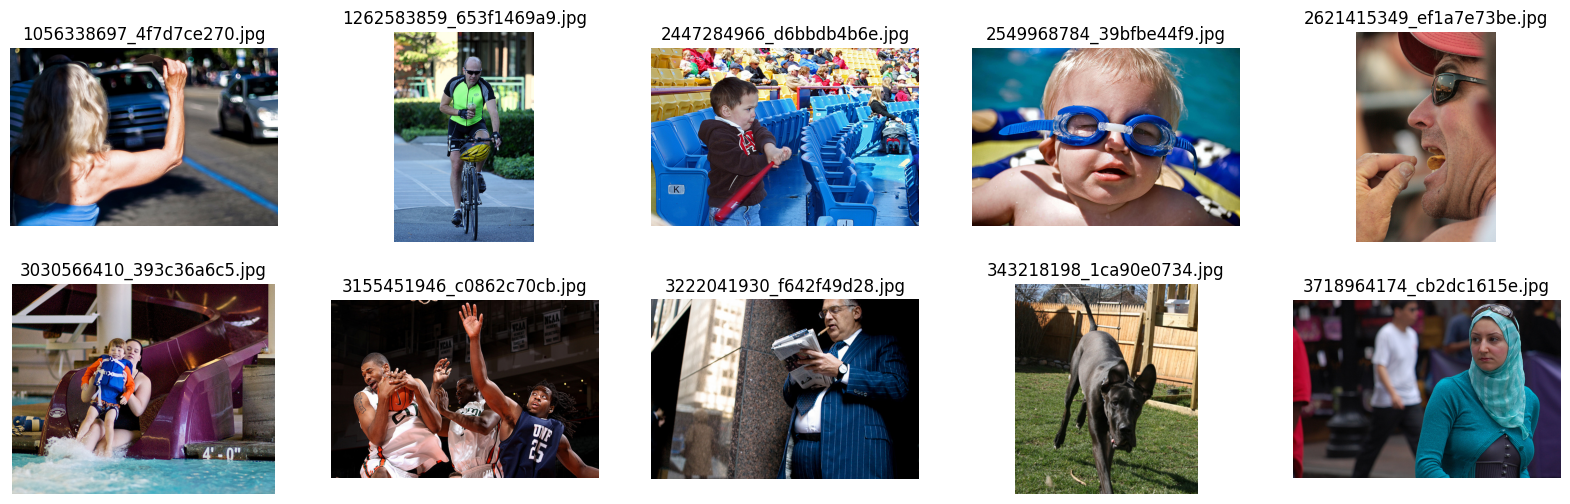

In [ ]:
fig = plt.figure(figsize=(20, 6))

# вывод изображений
for i in range(10):
    file_name = train_data['image'].unique()[i]
    image = plt.imread(f'/content/data/to_upload/train_images/{file_name}')
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_title(f'{file_name}')
    plt.imshow(image)
    plt.axis('off')

plt.show()

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

In [ ]:
crowd_results = pd.read_csv('/content/data/to_upload/CrowdAnnotations.tsv', sep='\t',
                         names=['image', 'query_id', 'rate_positive', 'count_positive', 'count_negative'])
crowd_results.head()

image                     query_id  rate_positive  \
0  1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2            1.0   
1  1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2            0.0   
2  1056338697_4f7d7ce270.jpg  1427391496_ea512cbe7f.jpg#2            0.0   
3  1056338697_4f7d7ce270.jpg  2073964624_52da3a0fc4.jpg#2            0.0   
4  1056338697_4f7d7ce270.jpg  2083434441_a93bc6306b.jpg#2            0.0   

   count_positive  count_negative  
0               3               0  
1               0               3  
2               0               3  
3               0               3  
4               0               3

In [ ]:
crowd_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   image           47830 non-null  object 
 1   query_id        47830 non-null  object 
 2   rate_positive   47830 non-null  float64
 3   count_positive  47830 non-null  int64  
 4   count_negative  47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

In [ ]:
expert_ratings = pd.read_csv('/content/data/to_upload/ExpertAnnotations.tsv', sep='\t',
                              names=['image', 'query_id', 'expert_1', 'expert_2', 'expert_3'])
expert_ratings.head()

image                     query_id  expert_1  expert_2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2         1         1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2         1         1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2         1         1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2         1         2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2         1         1   

   expert_3  
0         1  
1         2  
2         2  
3         2  
4         2

In [ ]:
expert_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   expert_1  5822 non-null   int64 
 3   expert_2  5822 non-null   int64 
 4   expert_3  5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

In [ ]:
# тестовые данные
test_data = pd.read_csv('/content/data/to_upload/test_queries.csv', sep='|', index_col=[0])
test_data.head()

query_id  \
0  1177994172_10d143cb8d.jpg#0   
1  1177994172_10d143cb8d.jpg#1   
2  1177994172_10d143cb8d.jpg#2   
3  1177994172_10d143cb8d.jpg#3   
4  1177994172_10d143cb8d.jpg#4   

                                          query_text  \
0  Two blonde boys , one in a camouflage shirt an...   
1  Two boys are squirting water guns at each other .   
2            Two boys spraying each other with water   
3  Two children wearing jeans squirt water at eac...   
4  Two young boys are squirting water at each oth...   

                       image  
0  1177994172_10d143cb8d.jpg  
1  1177994172_10d143cb8d.jpg  
2  1177994172_10d143cb8d.jpg  
3  1177994172_10d143cb8d.jpg  
4  1177994172_10d143cb8d.jpg

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


In [ ]:
print('Всего уникальных изображений в тестовой выборке:', len(test_data['image'].unique()))

Всего уникальных изображений в тестовой выборке: 100


Примеры изображений из тестовой выборки:

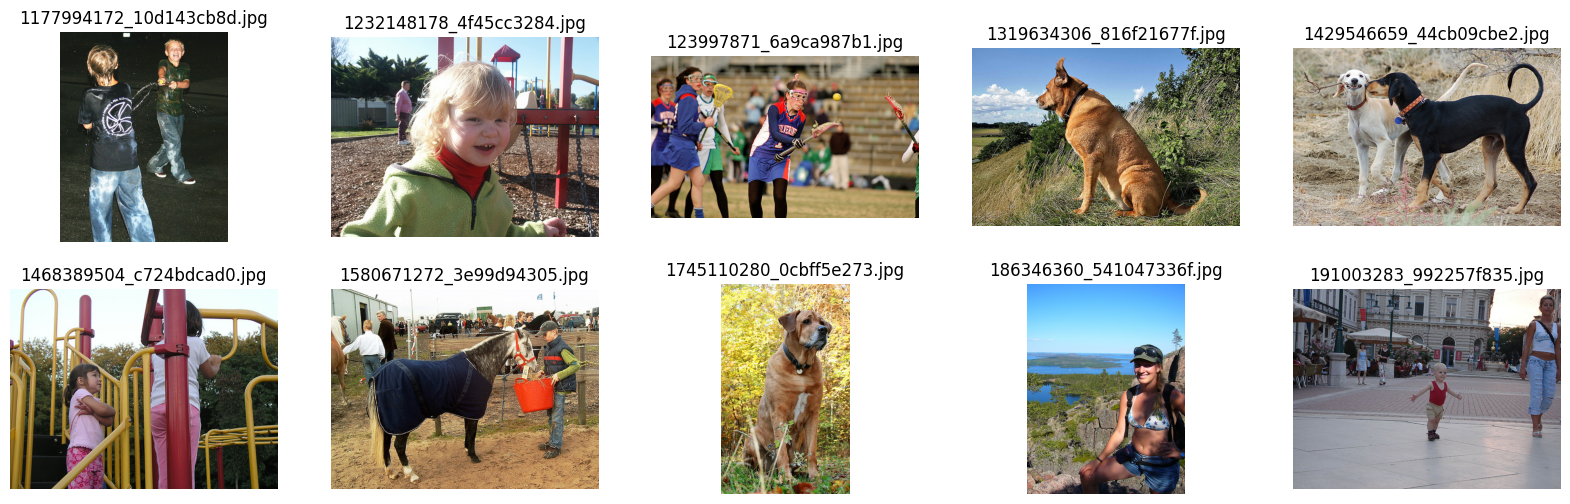

In [ ]:
fig = plt.figure(figsize=(20, 6))

# вывод изображений
for i in range(10):
    file_name = test_data['image'].unique()[i]
    image = plt.imread(f'/content/data/to_upload/test_images/{file_name}')
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_title(f'{file_name}')
    plt.imshow(image)
    plt.axis('off')

plt.show()

Все файлы успешно загружены (за исключением изображений). \
Пропусков в данных нет, все типы данных соответствуют ожидаемым.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Очень интересное и очень подробное исследование. Молодец, что кроме датафреймов смотришь и на сами изображения.</div>

## 2. Предобработка данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Раздел называется "исследовательский анализ данных", но мне кажется анализ ты уже сделала, а сейчас занимаешься предобрабокой данных, т.е. соединяешь даные из нескольких источников, чтобы с ними можно было дальше работать.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Переименовала этот раздел и добавила заголовок для предыдущего :)

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

Объединим 2 таблицы с оценками соответствия текстов и изображений в один датафрейм.

In [ ]:
ratings = expert_ratings.merge(crowd_results, on=['image', 'query_id'], how='outer')
ratings.head()

image                     query_id  expert_1  expert_2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2       1.0       1.0   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2       1.0       1.0   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2       1.0       1.0   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2       1.0       2.0   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2       1.0       1.0   

   expert_3  rate_positive  count_positive  count_negative  
0       1.0            0.0             0.0             3.0  
1       2.0            0.0             0.0             3.0  
2       2.0            NaN             NaN             NaN  
3       2.0            NaN             NaN             NaN  
4       2.0            NaN             NaN             NaN

Итоговую оценку попробуем рассчитывать по следующей схеме:
1. "Нормализуем" оценки экспертов: оценка 4 = 100% соответствия, оценка 1 = 0% соответствия, оценки 2 и 3 = 33% и 66% соответственно (примерно делим 100% на три равных части). Будем использовать доли - значения между 0 и 1.
2. Рассчитаем среднюю оценку экспертов
3. Рассчитаем итоговое значение вероятности соответствия текста и картинки по "финальной" оценке экспертов и доле позитивных отзывов с краудсорсинга: будем ценить отзывы экспертов выше, чем людей с краудсорсинга (их и меньше), поэтому первое значение будем учитывать с коэффициентом 0.6, а второе 0.4.

In [ ]:
# функция для перевода оценки эксперта в процент соответствия
def get_expert_percent(rating):
  return (rating-1)/3


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
вместо сложной конструкции с if-else гораздо проще применить простое преобразование (x-1) /3, которое даст тот же самый результат, но гораздо быстрее . И писать такой код гораздо проще, к тому же эта операция может быть векторизована, т.е. будет выполняться заметно быстрее.
    
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Действительно проще и лаконичней. Спасибо!

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 

а можно еще проще. 
    
    
    датафрейм['колонка'] = (датафрейм['колонка'] - 1) / 3 
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> комментарий ревьюера</b>

Узнаю артефакты colab.  Стандарт PEP8 рекомендует испльзовать отступы в 4 пробела, но в редакторе Gogle Colab по умолчанию 2 пробела на отступ. Но исправить это легко: правый верхний угол, шестеренка (настройки), заходим в растройки редактора и меняем отступ по умолчанию на 4 пробела.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Учту этот момент на будущее)

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

In [ ]:
# шаг 1: приведение к процентам соответствия
for col in ['expert_1', 'expert_2', 'expert_3']:
  ratings[col] = ratings[col].apply(get_expert_percent)

In [ ]:
ratings.head()

image                     query_id  expert_1  expert_2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2       0.0  0.000000   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2       0.0  0.000000   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2       0.0  0.000000   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2       0.0  0.333333   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2       0.0  0.000000   

   expert_3  rate_positive  count_positive  count_negative  
0  0.000000            0.0             0.0             3.0  
1  0.333333            0.0             0.0             3.0  
2  0.333333            NaN             NaN             NaN  
3  0.333333            NaN             NaN             NaN  
4  0.333333            NaN             NaN             NaN

In [ ]:
# шаг 2: вычисление средней экспертной оценки
ratings['mean_expert'] = ratings[['expert_1', 'expert_2', 'expert_3']].mean(axis=1)
ratings.head()

image                     query_id  expert_1  expert_2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2       0.0  0.000000   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2       0.0  0.000000   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2       0.0  0.000000   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2       0.0  0.333333   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2       0.0  0.000000   

   expert_3  rate_positive  count_positive  count_negative  mean_expert  
0  0.000000            0.0             0.0             3.0     0.000000  
1  0.333333            0.0             0.0             3.0     0.111111  
2  0.333333            NaN             NaN             NaN     0.111111  
3  0.333333            NaN             NaN             NaN     0.222222  
4  0.333333            NaN             NaN             NaN     0.111111

Если по сочетанию "картинка-текст" есть только один вариант мнений (или экспертов, или с краудсорсинга), то будем брать его.

In [ ]:
ratings['final_rating'] = np.nan

In [ ]:
# функция для вычисления финальной вероятности соответствия текста и картинки
# учитывает оценку экспертов с коэффициентом 0.6, оценку людей с краудсорсинга с коэффициентом 0.4
def get_final_rating(row):
  expert_rating = row['mean_expert']
  crowd_rating = row['rate_positive']

  if not np.isnan(expert_rating):
    if not np.isnan(crowd_rating):
      rating = expert_rating*0.6 + crowd_rating*0.4
    else:
      rating = expert_rating

  else:
    if not np.isnan(crowd_rating):
      rating = crowd_rating
    else:
      rating = np.nan

  row['final_rating'] = rating
  return row

In [ ]:
# шаг 3: вычисление итоговой оценки
ratings = ratings.apply(get_final_rating, axis=1)
ratings.head()

image                     query_id  expert_1  expert_2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2       0.0  0.000000   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2       0.0  0.000000   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2       0.0  0.000000   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2       0.0  0.333333   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2       0.0  0.000000   

   expert_3  rate_positive  count_positive  count_negative  mean_expert  \
0  0.000000            0.0             0.0             3.0     0.000000   
1  0.333333            0.0             0.0             3.0     0.111111   
2  0.333333            NaN             NaN             NaN     0.111111   
3  0.333333            NaN             NaN             NaN     0.222222   
4  0.333333            NaN             NaN             NaN     0.111111   

   final_rating  
0      0.000000  
1      0.066667  
2      0.111111  
3      0.222222  
4      0.111111

Итоговая оценка вычислена, поэтому оставим только три столбца, которые будут необходимы в дальнейшем.

In [ ]:
ratings = ratings[['image', 'query_id', 'final_rating']]
ratings.head()

image                     query_id  final_rating
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2      0.000000
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2      0.066667
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2      0.111111
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2      0.222222
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2      0.111111

Финальный шаг: объединим тренировочную выборку с вычисленными оценками. Строчки (пусть даже и с вычисленной оценкой), для которых не указано описание, учитывать не будем.

In [ ]:
train_data = train_data.merge(ratings, on=['image', 'query_id'], how='left')
train_data.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  final_rating  
0  A young child is wearing blue goggles and sitt...      0.000000  
1  A young child is wearing blue goggles and sitt...      0.000000  
2  A young child is wearing blue goggles and sitt...      0.133333  
3  A young child is wearing blue goggles and sitt...      1.000000  
4  A young child is wearing blue goggles and sitt...      0.000000

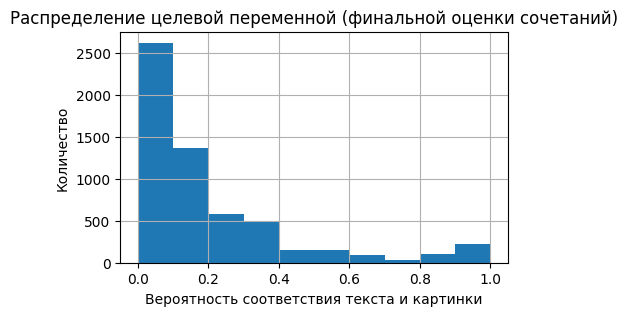

In [ ]:
train_data['final_rating'].hist(figsize=(5, 3))
plt.title('Распределение целевой переменной (финальной оценки сочетаний)')
plt.xlabel('Вероятность соответствия текста и картинки')
plt.ylabel('Количество')
plt.show()

БОльшая часть сочетаний текст-изображение помечена как малоподходящие друг другу. Однако есть и небольшой пик для "отлично соответствующих".


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Ты провела очень сложные преобразования. Но поверь, ни один читатель твоего проекта не сможет провести их в уме. Поэтому очень важно показать результат. А ключевой результат этого этапа - это основной датафрейм, с которым ты продолжишь работу и который содержит изображения, описания и оценки.  И результат, который ты можешь показать - это несколько строк этого датафрейма и вывод общей инфомрации, из которой мы можем увидеть размерность а также понять есть ли пропуски в данных.
    
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Ниже добавила краткий вывод.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

После всех преобразований обучающая выборка выглядит следующим образом:

In [ ]:
train_data.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  final_rating  
0  A young child is wearing blue goggles and sitt...      0.000000  
1  A young child is wearing blue goggles and sitt...      0.000000  
2  A young child is wearing blue goggles and sitt...      0.133333  
3  A young child is wearing blue goggles and sitt...      1.000000  
4  A young child is wearing blue goggles and sitt...      0.000000

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 0 to 5821
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image         5822 non-null   object 
 1   query_id      5822 non-null   object 
 2   query_text    5822 non-null   object 
 3   final_rating  5822 non-null   float64
dtypes: float64(1), object(3)
memory usage: 227.4+ KB


Преобразованный датафрейм содержит в себе информацию об имени изображения, id запроса, непосредственный текст запроса (описание) и итоговый рейтинг, который был рассчитан на основании средней оценки экспертов и доли положительных ответов людей с краудсорсинга (с коэффициентами 0.6 и 0.4 соответственно). Количество строк не изменилось, пропусков не наблюдается, типы данных соответствуют ожидаемым, следовательно, можно продолжить работу с этими данными в последующих разделах.

## 2. Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
>

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

Чтобы исключить из датасета изображения, нарушающие закон, для начала попробуем найти комментарии, содержащие слова, связанные с детьми.  

Перед этим проведем предобработку текстов (исключим стоп-слова и знаки препинания, приведем оставшиеся слова к нижнему регистру и начальной форме).

In [ ]:
# стоп-слова
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# очистка текста
def clear_text(text, stopwords=stopwords):
    words = re.sub(r'[^a-z]', ' ', text.lower()).split()
    words_without_stopwords = [word for word in words if word not in stopwords]

    return ' '.join(words_without_stopwords)

In [ ]:
# лемматизатор
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)                                   # токенизация
    lemm_list = [lemmatizer.lemmatize(token) for token in tokens]  # лемматизация
    lemm_text = ' '.join(lemm_list)

    return lemm_text

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# проверка функций
text = train_data['query_text'][0]
print(text)
print()
lemmatize_text(clear_text(text, stopwords))

A young child is wearing blue goggles and sitting in a float in a pool .



'young child wearing blue goggles sitting float pool'

In [ ]:
%%time

# лемматизация
train_data['lemm_text'] = train_data['query_text'].apply(lambda x: lemmatize_text(clear_text(x, stopwords)))
train_data.sample()

CPU times: user 610 ms, sys: 959 µs, total: 611 ms
Wall time: 612 ms


image                     query_id  \
1643  2473689180_e9d8fd656a.jpg  1517721825_10176d0683.jpg#2   

                              query_text  final_rating  \
1643  Three dogs running through water .      0.133333   

                    lemm_text  
1643  three dog running water

Список слов, которые могут встретиться при описаниях картинок с детьми:

In [ ]:
words_for_children = [
    'child',
    'children',
    'kid',
    'baby',
    'boy',
    'girl',
    'schoolboy',
    'schoolgirl',
    'son',
    'daughter',
    'young',
    'teenager',
    'juvenile',
    'underage',
    'toddler'
]

In [ ]:
# функция для определения слов, относящихся к детям, в тексте
def is_about_children(text):
  return len([word for word in text.split() if word in words_for_children]) > 0

In [ ]:
train_data['about_children'] = train_data['lemm_text'].apply(is_about_children)
train_data.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  final_rating  \
0  A young child is wearing blue goggles and sitt...      0.000000   
1  A young child is wearing blue goggles and sitt...      0.000000   
2  A young child is wearing blue goggles and sitt...      0.133333   
3  A young child is wearing blue goggles and sitt...      1.000000   
4  A young child is wearing blue goggles and sitt...      0.000000   

                                           lemm_text  about_children  
0  young child wearing blue goggles sitting float...            True  
1  young child wearing blue goggles sitting float...            True  
2  young child wearing blue goggles sitting float...            True  
3  young child wearing blue goggles sitting float...            True  
4  young child wearing blue goggles sitting float...            True

Как можно заметить, query_id (идентификатор запроса) состоит из 2-х частей: `<имя файла изображения>#<порядковый номер описания>`. При этом, для разных изображений, query_id может быть одинаковым, что вероятно значит, что имя файла в query_id может относиться к изображению, для которого описание создавалось изначально. Вынесем имя файла из query_id в отдельный столбец и проверим, действительно ли на подходящих изображениях, соответствующих описаниям, есть дети.

In [ ]:
train_data['query_image'] = train_data['query_id'].apply(lambda x: x.split('#')[0])
train_data.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  final_rating  \
0  A young child is wearing blue goggles and sitt...      0.000000   
1  A young child is wearing blue goggles and sitt...      0.000000   
2  A young child is wearing blue goggles and sitt...      0.133333   
3  A young child is wearing blue goggles and sitt...      1.000000   
4  A young child is wearing blue goggles and sitt...      0.000000   

                                           lemm_text  about_children  \
0  young child wearing blue goggles sitting float...            True   
1  young child wearing blue goggles sitting float...            True   
2  young child wearing blue goggles sitting float...            True   
3  young child wearing blue goggles sitting float...            True   
4  young child wearing blue goggles sitting float...            True   

                 query_image  
0  2549968784_39bfbe44f9.jpg  
1  2549968784_39bfbe44f9.jpg  
2  2549968784_39bfbe44f9.jpg  
3  2549968784_39bfbe44f9.jpg  
4  2549968784_39bfbe44f9.jpg

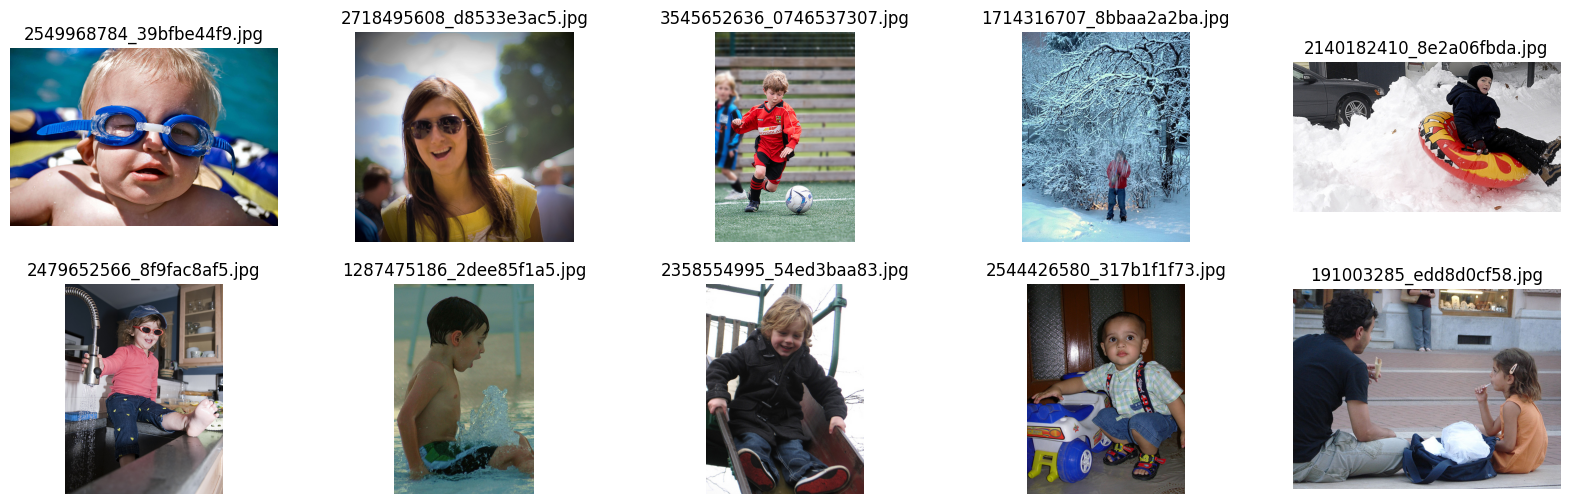

In [ ]:
images_with_children = train_data.loc[train_data['about_children'], 'query_image'].unique()

fig = plt.figure(figsize=(20, 6))

# вывод изображений
for i in range(10):
    file_name = images_with_children[i]
    image = plt.imread(f'/content/data/to_upload/train_images/{file_name}')
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_title(f'{file_name}')
    plt.imshow(image)
    plt.axis('off')

plt.show()

Практически все картинки (за исключением разве что второй, где нельзя точно определить возраст девушки "на глаз") содержат изображения детей. Следовательно, гипотеза была верна и мы можем удалить эти изображения из тренировочной выборки, чтобы не нарушать закон.

In [ ]:
train_data = train_data.loc[~train_data['image'].isin(images_with_children)]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4010 entries, 0 to 5820
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   image           4010 non-null   object 
 1   query_id        4010 non-null   object 
 2   query_text      4010 non-null   object 
 3   final_rating    4010 non-null   float64
 4   lemm_text       4010 non-null   object 
 5   about_children  4010 non-null   bool   
 6   query_image     4010 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 223.2+ KB


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Очистка датасета от детский изображений проведена совершенно корректно. Молодец, что использовала информацию о соответствии запросов и изображений, зашитую в кодировке запросов. </div>

Количество записей уменьшилось на 1000. Однако, теперь датасет можно использовать без опасений.

## 3. Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют "выделить" главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

Попробуем использовать ResNet50 из библиотеки keras, также предобученную на датасете ImageNet.

In [ ]:
%%time

# загрузка тренировочных изображений
datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='/content/data/to_upload/train_images',
    x_col='image',
    y_col='final_rating',
    target_size=(224, 224),
    batch_size=32,
    class_mode='input',
    shuffle=False,
    seed=12345)

Found 4010 validated image filenames.
CPU times: user 27.8 ms, sys: 8.1 ms, total: 35.9 ms
Wall time: 36.8 ms


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
    
Здесь есть проблема. Дело в том что у метода flow_from_dataframe есть дефолтный параметр shuffle =True, т.е. он по умолчанию перемешивает изображения. Поэтому ты конечно получишь вектора 4010 изображений, но если они будут перемешаны, то модели врядли смогут чему-то научиться.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

Может, отчасти из-за этого были такие проблемы с обучением моделей.. Исправила.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

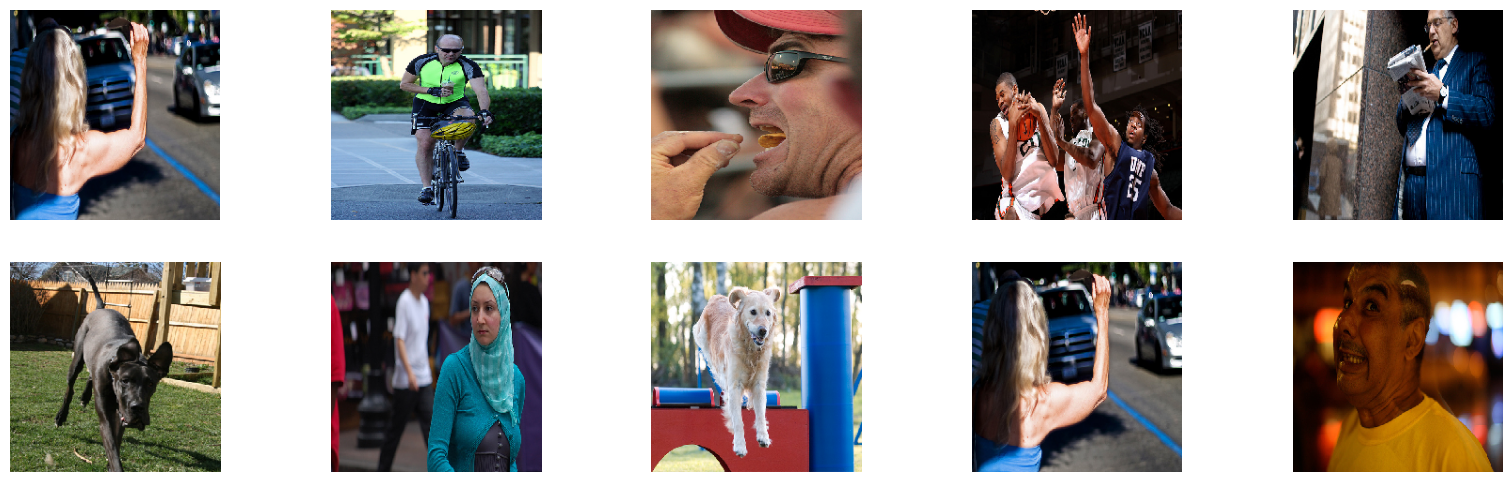

In [ ]:
features_train, target_train = next(train_gen_flow)
fig = plt.figure(figsize=(20, 6))

# вывод изображений
for i in range(10):
    image = features_train[i]
    ax = fig.add_subplot(2, 5, i+1)
    plt.imshow(image)
    plt.axis('off')

plt.show()

In [ ]:
# формирование модели на основе resnet50
def create_model():
  resnet_model = ResNet50(input_shape=(224, 224, 3),
                          weights='imagenet',
                          include_top=False)
  model = Sequential()
  model.add(resnet_model)
  model.add(GlobalAveragePooling2D())

  optimizer = Adam(learning_rate=0.0001)
  model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

  return model

In [ ]:
# функция для векторизации изображений
def vectorize_images(data):
  model = create_model()

  return model.predict(data, verbose=1)

In [ ]:
%%time

# векторизация тренировочной выборки
image_vectors = vectorize_images(train_gen_flow)

126/126 [==============================] - 30s 167ms/step
CPU times: user 35.5 s, sys: 2.68 s, total: 38.2 s
Wall time: 41.6 s


In [ ]:
image_vectors.shape

(4010, 2048)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Отлично, вектра для изображений получены👍 </div>

Векторизация изображений прошла успешно.

## 4. Векторизация текстов

Следующий этап — векторизация текстов. Вы можете поэкспериментировать с несколькими способами векторизации текстов:

- tf-idf
- word2vec
- \*трансформеры (например Bert)

\* — если вы изучали трансформеры в спринте Машинное обучение для текстов.


Используем tf-idf для векторизации текстов.

In [ ]:
count_tf_idf = TfidfVectorizer()
corpus_train = train_data['lemm_text'].values

In [ ]:
%%time

# векторизация текстов
count_tf_idf.fit(corpus_train)
train_tf_idf = count_tf_idf.transform(corpus_train)

CPU times: user 55.9 ms, sys: 0 ns, total: 55.9 ms
Wall time: 72.8 ms


In [ ]:
train_tf_idf.shape

(4010, 1259)

Векторизация текстов тоже выполнена.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Вектора для текста получены с помощью TF-IDF. Здесь конечно есть очень тонкий момент, и в другом проекте это мог бы быть красный комментарий. Ты же помнишь, что векторайзеры мы обучаем на обучающем датасете и применяем к валидационому и тестовому. А сейчас ты сделал вектора с использованием всех частей датасета.  Но для этого проекта это должно быть допустимо, т.к. .утечка,повышающая оценку на валидации врядли что-то сильно  испортит.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Да, помню этот момент. Но кажется немного сложным сделать так в этом проекте. Возможно, когда буду пересматривать его с целью выложить на гитхаб, переделаю этот момент с pipeline

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> Да я бы как раз не стал на этом зацикливаться сильно. Просто подсветил. Лучше попробуй сделать векторизацию через BERT </div>

## 5. Объединение векторов

Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

In [ ]:
features = np.concatenate((image_vectors, train_tf_idf.toarray()), axis=1)
features.shape

(4010, 3307)

In [ ]:
# сразу определим и целевую переменную
target = train_data['final_rating'].values
target.shape

(4010,)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

## 6. Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом [GroupShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) из библиотеки sklearn.model_selection.

Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

```
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

```

Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою.

Используем предложенный метод для определения выборок, которые будем использовать при подборе подходящей модели.

In [ ]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=123)

train_indices, valid_indices = next(gss.split(X=features,
                                             y=target,
                                             groups=train_data['image']))

# тренировочная выборка
features_train = features[train_indices]
target_train = target[train_indices]

# валидационная
features_valid = features[valid_indices]
target_valid = target[valid_indices]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

В качестве метрики качества для оценки моделей будем использовать RMSE, в качестве функции потерь - ее квадрат (MSE). MSE более чувствительна к выбросам (нежели MAE, например), поэтому будет сильнее наказывать модель за большие промахи + последующее обучение нейронной сети с оптимизацией MSE будет проходить быстрее. RMSE же измеряется в тех же единицах, что и целевая переменная (т.е. в % схожести условно), поэтому будет удобно смотреть, насколько критично модель ошибается.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В этом задании требуется выбрать основную метрику, которую ты будешь оптимизировать. Я вижу что ты уже выбрала метрику rmse, поэтому просто напиши обоснование для своего выбора.  </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Добавила объеснение выше.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

Для начала посмотрим, как справляется с данной задачей классическая **Линейная регрессия**.

In [ ]:
%%time

# линейная регрессия
model = LinearRegression()
model.fit(features_train, target_train)

preds_train = model.predict(features_train)
preds_valid = model.predict(features_valid)

rmse_train = mean_squared_error(target_train, preds_train, squared=False)
rmse_valid = mean_squared_error(target_valid, preds_valid, squared=False)

print('RMSE на тренировочной выборке:', rmse_train)
print('RMSE на валидационной выборке:', rmse_valid)

RMSE на тренировочной выборке: 0.16715034507895551
RMSE на валидационной выборке: 61219522.532969326
CPU times: user 16.4 s, sys: 1.76 s, total: 18.1 s
Wall time: 11.3 s


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Линейная регрессия сильно склонна к переобучению. Это очень хорошо показывает метрика на валидационной выборке. Попробуй взять модель с l1 или l2 регуляризацией</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Попробовала и то, и то. И правда, стало гораздо лучше

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

In [ ]:
# линейная регрессия с l1 регуляризацией
model = Lasso(alpha=1.0)
model.fit(features_train, target_train)

preds_train = model.predict(features_train)
preds_valid = model.predict(features_valid)

rmse_train = mean_squared_error(target_train, preds_train, squared=False)
rmse_valid = mean_squared_error(target_valid, preds_valid, squared=False)

print('RMSE на тренировочной выборке:', rmse_train)
print('RMSE на валидационной выборке:', rmse_valid)

RMSE на тренировочной выборке: 0.2634066468562288
RMSE на валидационной выборке: 0.25816320325459136


In [ ]:
# линейная регрессия с l2 регуляризацией
model = Ridge(alpha=1.0)
model.fit(features_train, target_train)

preds_train = model.predict(features_train)
preds_valid = model.predict(features_valid)

rmse_train = mean_squared_error(target_train, preds_train, squared=False)
rmse_valid = mean_squared_error(target_valid, preds_valid, squared=False)

print('RMSE на тренировочной выборке:', rmse_train)
print('RMSE на валидационной выборке:', rmse_valid)

RMSE на тренировочной выборке: 0.20203440157605038
RMSE на валидационной выборке: 0.25535739715641415


Классическая линейная регрессия абсолютно не справилась с задачей: наблюдается явное переобучение. А вот разновидности линейной регрессии с регуляризацией - достаточно неплохо. При этом, модель с регуляризацией l2 показала себя чуть лучше, чем модель с регуляризацией l1.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Чтобы понять насколько хороши наши модели попробуй оценить метрики для константной модели. Удивительно, но не все модели которые мы обучаем в этом проекте могут похвастаться адекватностью.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Результат уж точно лучше, чем у классической линейной регрессии :) Но совсем немногим ниже (если ниже), чем у остальных

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

In [ ]:
# константная модель
model = DummyRegressor(strategy="mean")
model.fit(features_train, target_train)

preds_train = model.predict(features_train)
preds_valid = model.predict(features_valid)

rmse_train = mean_squared_error(target_train, preds_train, squared=False)
rmse_valid = mean_squared_error(target_valid, preds_valid, squared=False)

print('RMSE на тренировочной выборке:', rmse_train)
print('RMSE на валидационной выборке:', rmse_valid)

RMSE на тренировочной выборке: 0.2634066468562288
RMSE на валидационной выборке: 0.25816320325459136


Как можно заметить, из трех обученных моделей линейной регрессии, только одна прошла проверку на адекватность - модель с регуляризацией l2. И то, метрика отличается на тысячные доли.

Необходимо попробовать более сложную модель. Посмотрим, как справится нейросеть.

In [ ]:
# нейронная сеть
input_shape = features_train.shape[1] # количество признаков

net = Sequential()
net.add(Dense(input_shape, input_shape=(input_shape,), activation='relu'))
# net.add(Dropout(0.5))
net.add(Dense(128, activation='relu'))
net.add(Dropout(0.5))
net.add(Dense(64, activation='relu'))
net.add(Dropout(0.5))
net.add(Dense(1))

optimizer = Adam(learning_rate=0.00001)
net.compile(optimizer=optimizer, loss=MeanSquaredError(), metrics=RootMeanSquaredError())

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Здесь  тоже возможна проблема с переобучением. Попробуй добавить слои прореживания (Дропаут)</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
По опыту скажу - 5 эпох для этой модели очень мало. Как правло требуется гораздо больше эпох для обучения модели, иногда это сотни.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Добавила в паре мест + увеличила количество эпох обучения до 100. Стало немного лучше, однако, как оказывается результат все равно "только чуть лучше" константной модели

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> На самом деле в такой конфигурации признаков  иногда удается создать и обучить модель, которая находит закономерности и начинает выдавать неплохой  результат. Но обучение нейронок это часто лотерея. К тому же данные должны быть "безупречные".  </div>

In [ ]:
%%time

net.fit(features_train,
        target_train,
        validation_data=(features_valid, target_valid),
        batch_size=32,
        epochs=100,
        shuffle=True,
        verbose=1)

Epoch 1/100
87/87 [==============================] - 2s 9ms/step - loss: 0.2241 - root_mean_squared_error: 0.4734 - val_loss: 0.0726 - val_root_mean_squared_error: 0.2695
Epoch 2/100
87/87 [==============================] - 1s 7ms/step - loss: 0.0859 - root_mean_squared_error: 0.2931 - val_loss: 0.0681 - val_root_mean_squared_error: 0.2610
Epoch 3/100
87/87 [==============================] - 1s 6ms/step - loss: 0.0808 - root_mean_squared_error: 0.2843 - val_loss: 0.0679 - val_root_mean_squared_error: 0.2606
Epoch 4/100
87/87 [==============================] - 1s 6ms/step - loss: 0.0797 - root_mean_squared_error: 0.2823 - val_loss: 0.0689 - val_root_mean_squared_error: 0.2626
Epoch 5/100
87/87 [==============================] - 1s 7ms/step - loss: 0.0767 - root_mean_squared_error: 0.2770 - val_loss: 0.0674 - val_root_mean_squared_error: 0.2596
Epoch 6/100
87/87 [==============================] - 1s 8ms/step - loss: 0.0772 - root_mean_squared_error: 0.2779 - val_loss: 0.0663 - val_root_m

Нейросеть показала себя гораздо лучше на векторизованных данных. \
Лучшее значение RMSE на валидационных данных, что удалось получить = 0.2458

## 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

In [ ]:
# загрузка тестовых изображений
datagen = ImageDataGenerator(rescale=1./255)
test_gen_flow = datagen.flow_from_dataframe(
    dataframe=test_data.drop_duplicates(subset='image'),
    directory='/content/data/to_upload/test_images',
    x_col='image',
    y_col=None,
    target_size=(224, 224),
    batch_size=32,
    class_mode='input',
    shuffle=False,
    seed=12345)

Found 100 validated image filenames.


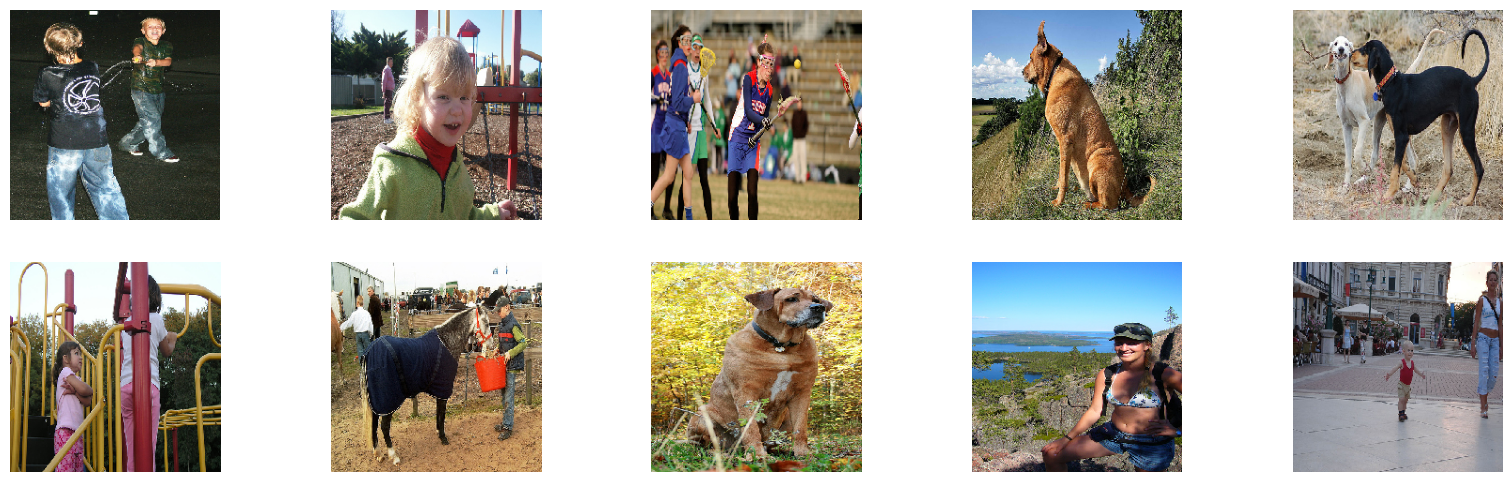

In [ ]:
features_test, target_test = next(test_gen_flow)
fig = plt.figure(figsize=(20, 6))

# вывод изображений
for i in range(10):
    image = features_test[i]
    ax = fig.add_subplot(2, 5, i+1)
    plt.imshow(image)
    plt.axis('off')

plt.show()

In [ ]:
%%time

# векторизация тестовых изображений
test_image_vectors = vectorize_images(test_gen_flow)
test_image_vectors.shape

4/4 [==============================] - 2s 320ms/step
CPU times: user 4.4 s, sys: 208 ms, total: 4.61 s
Wall time: 4.32 s


(100, 2048)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍

Да, векторизацию изображений лучше провести заранее. Молодец, что здесь ты не перемешиваешь изображения
</div>

Для тестирования модели будем использовать следующую функцию:

In [ ]:
# фунция для тестирования модели
def get_suitable_image(text):
  print('Query:', text)

  # предобработка текстового описания
  prepared_text = lemmatize_text(clear_text(text))

  # проверка на юридически вредный контент
  if is_about_children(prepared_text):
    print('This image is unavailable in your country in compliance with local laws')
    print()
    return None

  # векторизация текста и объединение с векторами изображений
  tf_idf_text = np.repeat(count_tf_idf.transform([prepared_text]).toarray(), 100, axis=0)
  features = np.concatenate((test_image_vectors, tf_idf_text), axis=1)

  # применение модели
  preds = net.predict(features)
  images = test_data.drop_duplicates(subset='image').copy(deep=True)
  images['predicted_rating'] = np.reshape(preds, (preds.shape[0],))

  # вывод наиболее подходящего изображения
  best_image = images.sort_values(by='predicted_rating', ascending=False)['image'].values[0]
  best_percent = images.sort_values(by='predicted_rating', ascending=False)['predicted_rating'].values[0]
  image = plt.imread(f'/content/data/to_upload/test_images/{best_image}')

  print()
  plt.title(f'{best_image}. Percent: {"{:.2%}".format(best_percent)}')
  plt.imshow(image)
  plt.show()
  print()

  return None

Query: Two women are wearing lavender scarves an their heads .
4/4 [==============================] - 0s 3ms/step



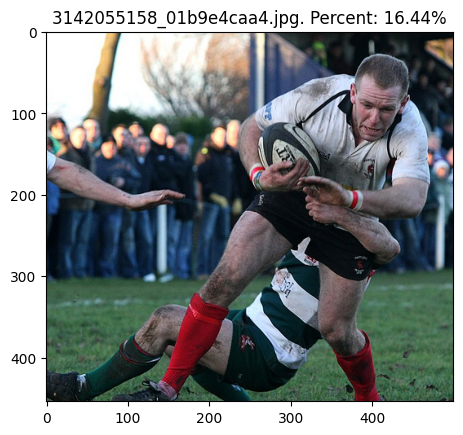


Query: A girl in a purple shirt feeding ducks
This image is unavailable in your country in compliance with local laws

Query: A man and a woman are sitting on a bench outside a wooden building .
4/4 [==============================] - 0s 3ms/step



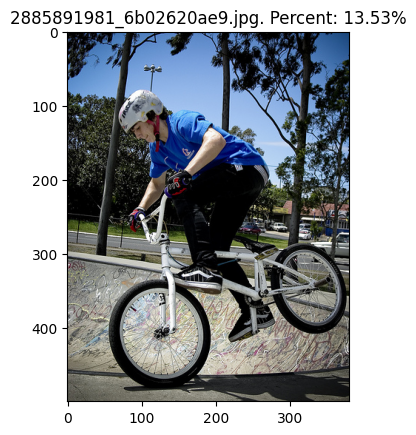


Query: a black and grey dog catches a tennis ball at the beach
4/4 [==============================] - 0s 4ms/step



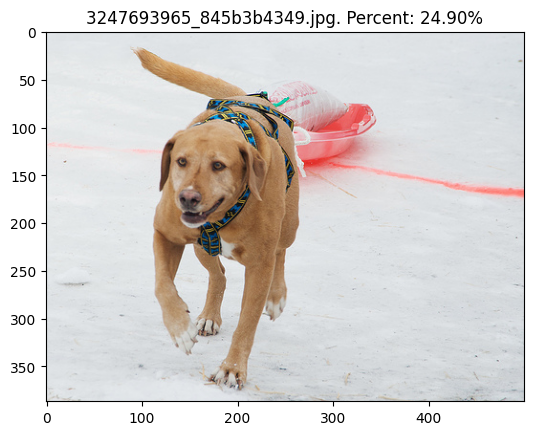


Query: Two boys playing in water .
This image is unavailable in your country in compliance with local laws

Query: A girl is wearing a blue wig under a brown hooded jacket .
This image is unavailable in your country in compliance with local laws

Query: a group of teenagers standing outside of a convienance store .
This image is unavailable in your country in compliance with local laws

Query: A dog fetching a stick .
4/4 [==============================] - 0s 5ms/step



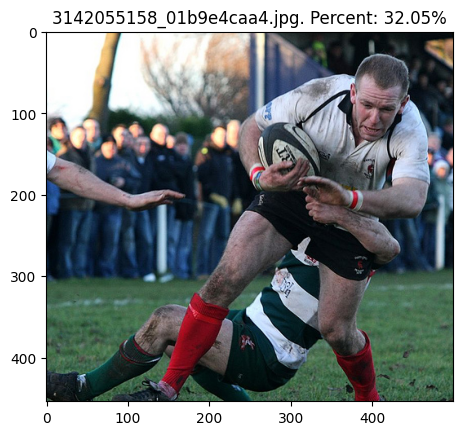


Query: The tennis player in the blue shirt is holding his racquet up in the air .
4/4 [==============================] - 0s 4ms/step



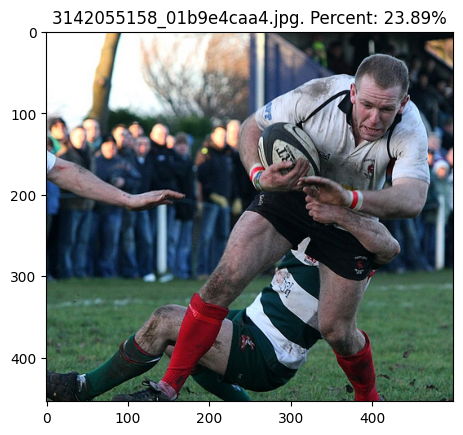


Query: little dog is jumping up to catch a red ball in its mouth .
4/4 [==============================] - 0s 4ms/step



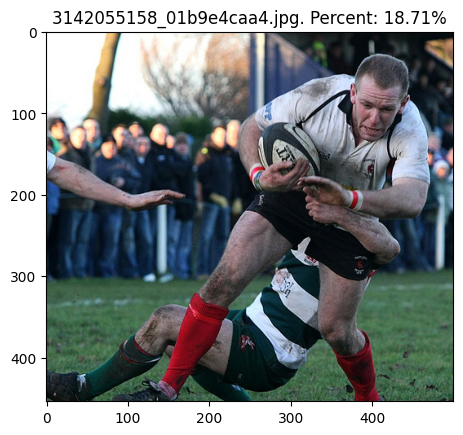

In [ ]:
queries = test_data.sample(10)['query_text'].values

for query in queries:
  get_suitable_image(query)

К сожалению, в большинстве случаев модель плохо справилась со своей задачей.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Функции написаны и со своей задачей справляются. Принимают на вход текст и находят изображение. Отрабатывают контроль "запрещенного контента".

Да, ты права, к сожалению работают они не очень. И причин тут несколько - мало данных, не очень правильный подход. На мой взгляд более перспективным было бы привести ембеддинги изображений и текстов к одной размерности в одно пространство (через обучаемые слои) и в качестве меры близости использовать косинусное расстояние.
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому.
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения.
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0).
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768).
    
***
    
А еще я видел удачный проект, где для векторизации изображений использовалось предсказание Resnet в котором не отключался последний слой. Получился вектор предсказаний верояятности что изображение принадлежит к каждому из 1000 классов Imagenet. И в сочетании с подходом "мешок слов" для текстов это может дать неплохой результа. Такая модель находит людей, собак, машины, снег и т.д.  
   
</div>

## 8. Выводы

В рамках данного проекта, необходимо было разработать демонстрационную версию поиска изображений по запросу. Изображения были успешно загружены, тренировочная выборка также была исследована перед обучением: в частности, была выведена единая оценка (на основе оценок трех экспертов и людей с краудсорсинга) и удалены изображения, содержащие фотографии детей и подростков, что могло бы привести к юридическим последствиям.

Перед обучением, все изображения и тексты были векторизованы, а численные данные отшкалированы для получения лучших результатов. Для векторизации изображений была использована предобученная на imagenet модель ResNet50, для векторизации текстов - технология TF-IDF.

Было предложено два варианта решения задачи через модели машинного обучения. Модель линейной регрессии оказалась слишком простой и очень сильно переобучилась на части тренировочной выборки. Полносвязная нейросеть справилась лучше. Удалось получить RMSE 0.2458 на 100 эпохах обучения. Однако на отложенной тестовой выборке справилась не так хорошо, как ожидалось. Многие изображения плохо соответствуют описаниям. Причин для этого может быть достаточно: неправильно подобранные методы предобработки, векторизации, недостаточное количество и разнообразность слоев, а также недостаточное количество эпох обучения.

***Примечание для ревьюера:*** *я очень старалась закрыть проект во время, но, к сожалению, по личным обстоятельствам приходится сдавать уже даже после официального жесткого дедлайна. Переходить в следующую когорту и откатываться на 4 недели назад очень не хочется. Поэтому пожалуйста, если не будет критических замечаний, зачтите проект сразу. Все комментарии я, разумеется, учту в своих последующих проектах! Спасибо большое за понимание.*

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>
Светлана, еще раз привет.
    
К сожалению принять проект сразу не могу, есть пара красных комментариев.

Но я вижу что их исправление не займет у тебя много времени. Поэтому давай поступим так - я постараюсь проверить повторное ревью как можно быстрее. И напишу куратору, что тебе осталось всего ничего.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Спасибо большое за полное и содержательное ревью! Это был очень непростой проект и твои комментарии помогли мне еще лучше в нем разобраться. Я постаралась исправить, все, что смогла. Об альтернативных методах еще почитаю, возможно, с чем-то даже поэкспериментирую, когда появится больше свободного времени. Еще раз спасибо!!

</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>
    
Рад, что мое ревью помогло немного лучше разобраться. Проект действительно сложный, зато сложные задачи поднимают планку ))
    
    

Проект принят. Поздравляю и желаю дальнейших успехов!
</div>

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Проверены экспертные оценки и краудсорсинговые оценки
- [x]  Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- [x]  Изображения векторизованы
- [x]  Текстовые запросы векторизованы
- [x]  Данные корректно разбиты на тренировочную и тестовую выборки
- [x]  Предложена метрика качества работы модели
- [x]  Предложена модель схожести изображений и текстового запроса
- [x]  Модель обучена
- [x]  По итогам обучения модели сделаны выводы
- [x]  Проведено тестирование работы модели
- [x]  По итогам тестирования визуально сравнили качество поиска